In [1]:
import os
my_path = os.path.dirname(os.path.abspath('__file__'))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import plotly.graph_objs as go
init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
#Import Data

df = pd.read_excel('../Defaulter/data/data.xlsx', encoding = "ISO-8859-1")
df.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
Customer_ID                    5000 non-null int64
Status_Checking_Acc            5000 non-null object
Duration_in_Months             5000 non-null int64
Credit_History                 5000 non-null object
Purposre_Credit_Taken          5000 non-null object
Credit_Amount                  5000 non-null int64
Savings_Acc                    5000 non-null object
Years_At_Present_Employment    5000 non-null object
Inst_Rt_Income                 5000 non-null int64
Marital_Status_Gender          5000 non-null object
Other_Debtors_Guarantors       5000 non-null object
Current_Address_Yrs            5000 non-null int64
Property                       5000 non-null object
Age                            5000 non-null int64
Other_Inst_Plans               5000 non-null object
Housing                        5000 non-null object
Num_CC                         5000 non-null int64
Job             

In [4]:
df.describe()

,Customer_ID,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment,Count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,102500.500000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.299000,1.0
std,1443.520003,12.053989,2821.607329,1.118267,1.103276,11.370917,0.577423,0.361941,0.457866,0.0
min,100001.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,1.0
25%,101250.750000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.0
50%,102500.500000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,1.0
75%,103750.250000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.0
max,105000.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.0


In [5]:
#Count attribute is useless so drop that column
df.set_index('Customer_ID', inplace=True)
df.drop('Count', axis=1, inplace=True)

In [6]:
df.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
Customer_ID,,,,,,,,,,,,,,,,,,,,,
100001,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
100002,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
100003,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
100004,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
100005,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [7]:
X = df.drop("Default_On_Payment", axis=1)
y = df['Default_On_Payment']

In [8]:
X.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker
Customer_ID,,,,,,,,,,,,,,,,,,,,
100001,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
100002,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
100003,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
100004,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
100005,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 100001 to 105000
Data columns (total 20 columns):
Status_Checking_Acc            5000 non-null object
Duration_in_Months             5000 non-null int64
Credit_History                 5000 non-null object
Purposre_Credit_Taken          5000 non-null object
Credit_Amount                  5000 non-null int64
Savings_Acc                    5000 non-null object
Years_At_Present_Employment    5000 non-null object
Inst_Rt_Income                 5000 non-null int64
Marital_Status_Gender          5000 non-null object
Other_Debtors_Guarantors       5000 non-null object
Current_Address_Yrs            5000 non-null int64
Property                       5000 non-null object
Age                            5000 non-null int64
Other_Inst_Plans               5000 non-null object
Housing                        5000 non-null object
Num_CC                         5000 non-null int64
Job                            5000 non-null object
Dependen

In [10]:
#Checking Number of Defaults

y.value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

A11    49.270073
A12    38.661710
A13    22.222222
A14    11.675127
Name: Status_Checking_Acc, dtype: float64


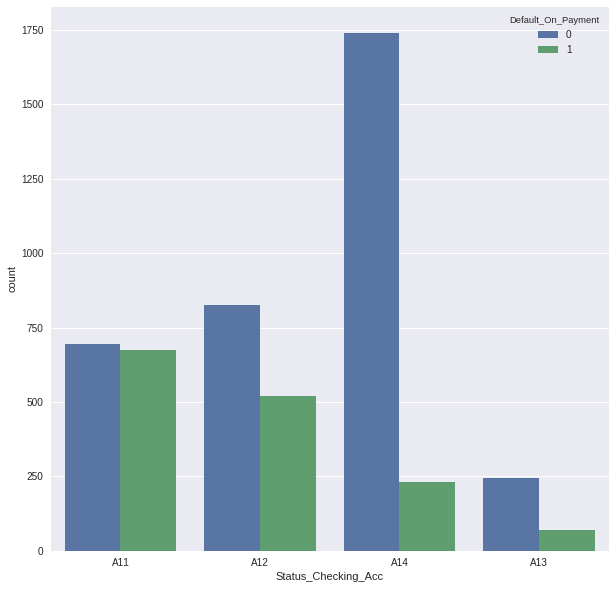

In [14]:
#Default Rate based on Status Checking Account

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Status_Checking_Acc'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Status Checking Account Default Rate.png')
k = df[df['Default_On_Payment']==1]['Status_Checking_Acc'].value_counts()
k_not = df[df['Default_On_Payment']==0]['Status_Checking_Acc'].value_counts()

print(k/(k+k_not)*100)

Series([], Name: Status_Checking_Acc, dtype: float64)


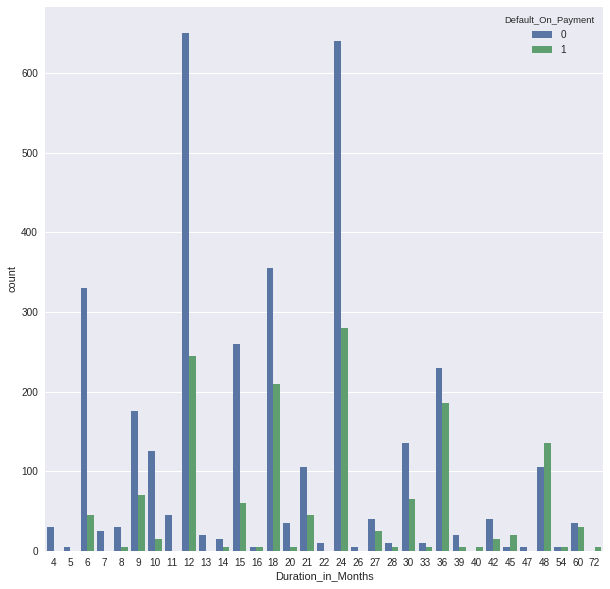

In [16]:
#Default Rate based on Duration in Months

fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=df['Duration_in_Months'], hue=df['Default_On_Payment'], data=df,ax=ax)
plt.savefig(my_path+'/plots/Status Checking Account Default Rate.png')
k = df[df['Duration_in_Months']==1]['Status_Checking_Acc'].value_counts()
k_not = df[df['Duration_in_Months']==0]['Status_Checking_Acc'].value_counts()

print(k/(k+k_not)*100)